**Dependencies**:


In [1]:
import numpy as np
import pandas as pd
import cv2
import glob
import seaborn as sns

**Mounting Drive**


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Datasets**


In [3]:
Nonmaskedimages = [cv2.imread(file) for file in glob.glob('/content/drive/MyDrive/Colab Notebooks/Kaggle/Non masked/*.jpg')]

In [4]:
Maskedimages = [cv2.imread(file) for file in glob.glob('/content/drive/MyDrive/Colab Notebooks/Kaggle/Masked/*/*.jpg')]

In [5]:
len(Maskedimages)

447

In [6]:
# len(images)

In [7]:
Nonmask=np.array(Nonmaskedimages)
mask=np.array(Maskedimages)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


Dataframe for masked images

In [8]:
masked=[]
for h in range(len(mask)):
  mask[h]=cv2.resize(mask[h],(128,128))
  ll=[]
  lh=len(mask[h])
  for i in range(lh):
    li=len(mask[h][i])
    for j in range(li):
      for k in mask[h][i][j]:
        ll.append(k)

  masked.append(ll)

In [9]:
maskdf=pd.DataFrame(masked)
maskdf.insert(loc=0,column='target',value=np.ones(len(masked)))
del masked

In [10]:
# maskdf

Dataframe for Nonmasked images

In [11]:
Nonmasked=[]
for h in range(len(Nonmask)):
  Nonmask[h]=cv2.resize(Nonmask[h],(128,128))
  ll=[]
  lh=len(Nonmask[h])
  for i in range(lh):
    li=len(Nonmask[h][i])
    for j in range(li):
      for k in Nonmask[h][i][j]:
        ll.append(k)
  Nonmasked.append(ll)

In [12]:
Nonmaskdf=pd.DataFrame(Nonmasked)
Nonmaskdf.insert(loc=0,column='target',value=np.zeros(len(Nonmasked)))
del Nonmasked

In [13]:
# Nonmaskdf

**Final dataframe**


In [14]:
df=pd.DataFrame()
df=df.append(maskdf)
df=df.append(Nonmaskdf)
# df
del maskdf
del Nonmaskdf

In [15]:
# del maskdf
# del Nonmaskdf

In [16]:
# df.shape

In [17]:
 df.head()

,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,49112,49113,49114,49115,49116,49117,49118,49119,49120,49121,49122,49123,49124,49125,49126,49127,49128,49129,49130,49131,49132,49133,49134,49135,49136,49137,49138,49139,49140,49141,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,1.0,96,80,68,96,80,68,97,81,69,96,80,69,95,78,69,94,78,69,94,77,68,94,76,68,94,76,69,96,78,71,96,78,72,93,75,69,91,72,67,...,89,104,96,89,104,96,89,105,97,90,105,97,90,105,97,90,105,97,90,106,98,91,106,98,91,106,98,91,106,98,91,106,98,91,107,99,92,107,99,92
1,1.0,12,8,74,11,8,75,11,10,74,12,11,73,12,12,72,14,11,72,16,13,80,34,30,105,44,43,124,46,46,130,45,46,132,37,38,125,35,36,126,...,252,229,238,252,232,241,253,235,244,254,235,245,252,236,246,253,237,247,254,236,247,251,233,246,254,232,244,254,233,245,255,233,246,254,231,243,252,229,240,254
2,1.0,134,160,224,134,159,223,133,159,225,126,152,222,119,145,219,104,131,210,85,114,196,62,93,177,48,80,170,41,71,166,38,67,165,32,59,157,28,53,152,...,252,169,190,254,188,205,255,193,206,254,198,210,253,203,213,253,208,215,255,210,217,255,210,218,255,212,219,254,214,220,255,214,220,255,215,222,255,216,224,254
3,1.0,27,56,76,31,58,80,30,57,78,25,51,72,19,43,65,16,40,62,20,47,68,25,53,74,29,58,79,34,63,84,37,63,86,38,62,86,37,58,85,...,44,37,42,42,36,41,42,33,38,39,33,39,40,30,38,38,30,39,39,32,40,40,25,32,32,26,31,31,24,27,28,25,27,27,26,26,26,27,27,27
4,1.0,62,77,96,67,83,102,72,88,107,73,90,109,71,88,107,67,85,104,67,85,104,69,87,105,70,91,108,73,93,111,71,91,112,70,91,113,70,91,113,...,196,220,214,200,222,218,203,225,222,207,227,225,211,227,226,212,227,226,212,227,225,211,227,224,209,225,222,207,224,221,207,224,221,208,225,222,208,225,222,208


###_CONCISE **SUMMARY** AND IDENTIFICATION OF **DATA TYPES**_



In [18]:
#Concise Summary
# print(df.info())

In [19]:
#Data Types 
# print(df.dtypes)

###_**SHAPE** OF DATASET_

In [20]:
df.groupby('target').size()

###_FINDING **NULL VALUES**_

In [21]:
#Null Values
df.isna().sum()

###_VISUALIZING THE **DISTRIBUTION OF TARGET VARIABLE**_

In [22]:
#Countplot
sns.set_theme(style="darkgrid")
sns.countplot(x="target", data=df)

###_SEPERATING **TARGET** AND **FEATURE** VARIABLES AND SPLITTING THEM FOR **TRAINING** and **TESTING**_

In [23]:
#Target and Feature Variables
y = df.iloc[:,0].values
x = df.drop(['target'],axis=1).to_numpy()

In [24]:
#Target and Feature Variables
t = df.iloc[:,0]
f = df.drop(['target'],axis=1)

In [25]:
f


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,49112,49113,49114,49115,49116,49117,49118,49119,49120,49121,49122,49123,49124,49125,49126,49127,49128,49129,49130,49131,49132,49133,49134,49135,49136,49137,49138,49139,49140,49141,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,96,80,68,96,80,68,97,81,69,96,80,69,95,78,69,94,78,69,94,77,68,94,76,68,94,76,69,96,78,71,96,78,72,93,75,69,91,72,67,93,...,89,104,96,89,104,96,89,105,97,90,105,97,90,105,97,90,105,97,90,106,98,91,106,98,91,106,98,91,106,98,91,106,98,91,107,99,92,107,99,92
1,12,8,74,11,8,75,11,10,74,12,11,73,12,12,72,14,11,72,16,13,80,34,30,105,44,43,124,46,46,130,45,46,132,37,38,125,35,36,126,32,...,252,229,238,252,232,241,253,235,244,254,235,245,252,236,246,253,237,247,254,236,247,251,233,246,254,232,244,254,233,245,255,233,246,254,231,243,252,229,240,254
2,134,160,224,134,159,223,133,159,225,126,152,222,119,145,219,104,131,210,85,114,196,62,93,177,48,80,170,41,71,166,38,67,165,32,59,157,28,53,152,24,...,252,169,190,254,188,205,255,193,206,254,198,210,253,203,213,253,208,215,255,210,217,255,210,218,255,212,219,254,214,220,255,214,220,255,215,222,255,216,224,254
3,27,56,76,31,58,80,30,57,78,25,51,72,19,43,65,16,40,62,20,47,68,25,53,74,29,58,79,34,63,84,37,63,86,38,62,86,37,58,85,35,...,44,37,42,42,36,41,42,33,38,39,33,39,40,30,38,38,30,39,39,32,40,40,25,32,32,26,31,31,24,27,28,25,27,27,26,26,26,27,27,27
4,62,77,96,67,83,102,72,88,107,73,90,109,71,88,107,67,85,104,67,85,104,69,87,105,70,91,108,73,93,111,71,91,112,70,91,113,70,91,113,68,...,196,220,214,200,222,218,203,225,222,207,227,225,211,227,226,212,227,226,212,227,225,211,227,224,209,225,222,207,224,221,207,224,221,208,225,222,208,225,222,208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,113,120,135,108,115,130,100,107,122,93,100,115,87,94,109,85,92,107,85,92,107,86,92,108,86,94,109,89,96,111,93,100,115,104,111,126,119,127,140,139,...,192,118,126,196,122,130,200,126,134,204,126,135,203,126,135,203,129,136,205,131,138,206,128,134,201,120,126,193,109,115,182,99,102,170,90,94,160,84,88,153
1996,52,11,16,51,10,15,51,10,15,50,10,15,50,10,15,50,11,13,49,11,13,49,12,14,48,14,15,48,14,15,49,15,15,50,16,16,50,16,17,47,...,219,136,191,216,137,191,214,137,191,214,137,191,214,137,191,214,137,191,214,137,191,214,137,191,214,138,192,215,138,192,215,138,192,215,137,191,214,137,191,214
1997,138,150,160,137,149,159,136,148,158,135,147,157,135,146,157,136,145,158,137,146,159,132,141,154,120,129,142,105,113,126,88,96,109,71,79,92,59,68,80,50,...,197,114,127,212,125,140,226,133,147,235,131,146,234,127,144,231,121,137,226,114,131,220,107,125,214,105,123,214,104,122,213,104,123,214,103,121,213,100,118,211
1998,39,6,13,39,6,13,39,6,13,39,6,13,39,6,13,39,5,15,39,6,15,40,6,16,41,7,17,43,9,19,45,11,20,46,12,22,44,14,21,40,...,40,39,25,37,43,26,39,43,28,42,43,30,45,44,31,47,46,32,50,47,35,54,53,41,61,63,51,73,72,63,84,83,74,97,95,87,112,107,98,124


In [26]:
#Train-Test Split
#50% training 50% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

In [27]:
x_train.shape


(1223, 49152)

###_VISUALIZING THE **LATENT SPACE**_

In [28]:
# #Applying t-SNE
# from sklearn.manifold import TSNE
# X_embedded = TSNE(n_components=2).fit_transform(x)

In [29]:
# #Shape
# X_embedded.shape

###_**DIMENSIONALITY REDUCTION**_

**PCA**


In [30]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x_pca = st.fit_transform(x)

In [31]:
#Choosing the Minimum number of Principal Components such that 90% of the Variance is retained
from sklearn.decomposition import PCA
pca = PCA(.90)
pca.fit(x_pca)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [32]:
#Number of Components
pca.n_components_

82

In [33]:
#Transformation
x_pca=pca.transform(x_pca)

In [34]:
np.unique(x_pca)

array([-322.38878324, -312.76624683, -303.70221189, ...,  345.38422386,
        358.10641998,  372.07509141])

In [35]:
x_pca.shape

(2447, 82)

In [36]:
#Train-Test Split for PCA Tranformed Features
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca, y, test_size=0.2, random_state=42)

In [37]:
df

,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,49112,49113,49114,49115,49116,49117,49118,49119,49120,49121,49122,49123,49124,49125,49126,49127,49128,49129,49130,49131,49132,49133,49134,49135,49136,49137,49138,49139,49140,49141,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,1.0,96,80,68,96,80,68,97,81,69,96,80,69,95,78,69,94,78,69,94,77,68,94,76,68,94,76,69,96,78,71,96,78,72,93,75,69,91,72,67,...,89,104,96,89,104,96,89,105,97,90,105,97,90,105,97,90,105,97,90,106,98,91,106,98,91,106,98,91,106,98,91,106,98,91,107,99,92,107,99,92
1,1.0,12,8,74,11,8,75,11,10,74,12,11,73,12,12,72,14,11,72,16,13,80,34,30,105,44,43,124,46,46,130,45,46,132,37,38,125,35,36,126,...,252,229,238,252,232,241,253,235,244,254,235,245,252,236,246,253,237,247,254,236,247,251,233,246,254,232,244,254,233,245,255,233,246,254,231,243,252,229,240,254
2,1.0,134,160,224,134,159,223,133,159,225,126,152,222,119,145,219,104,131,210,85,114,196,62,93,177,48,80,170,41,71,166,38,67,165,32,59,157,28,53,152,...,252,169,190,254,188,205,255,193,206,254,198,210,253,203,213,253,208,215,255,210,217,255,210,218,255,212,219,254,214,220,255,214,220,255,215,222,255,216,224,254
3,1.0,27,56,76,31,58,80,30,57,78,25,51,72,19,43,65,16,40,62,20,47,68,25,53,74,29,58,79,34,63,84,37,63,86,38,62,86,37,58,85,...,44,37,42,42,36,41,42,33,38,39,33,39,40,30,38,38,30,39,39,32,40,40,25,32,32,26,31,31,24,27,28,25,27,27,26,26,26,27,27,27
4,1.0,62,77,96,67,83,102,72,88,107,73,90,109,71,88,107,67,85,104,67,85,104,69,87,105,70,91,108,73,93,111,71,91,112,70,91,113,70,91,113,...,196,220,214,200,222,218,203,225,222,207,227,225,211,227,226,212,227,226,212,227,225,211,227,224,209,225,222,207,224,221,207,224,221,208,225,222,208,225,222,208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,113,120,135,108,115,130,100,107,122,93,100,115,87,94,109,85,92,107,85,92,107,86,92,108,86,94,109,89,96,111,93,100,115,104,111,126,119,127,140,...,192,118,126,196,122,130,200,126,134,204,126,135,203,126,135,203,129,136,205,131,138,206,128,134,201,120,126,193,109,115,182,99,102,170,90,94,160,84,88,153
1996,0.0,52,11,16,51,10,15,51,10,15,50,10,15,50,10,15,50,11,13,49,11,13,49,12,14,48,14,15,48,14,15,49,15,15,50,16,16,50,16,17,...,219,136,191,216,137,191,214,137,191,214,137,191,214,137,191,214,137,191,214,137,191,214,137,191,214,138,192,215,138,192,215,138,192,215,137,191,214,137,191,214
1997,0.0,138,150,160,137,149,159,136,148,158,135,147,157,135,146,157,136,145,158,137,146,159,132,141,154,120,129,142,105,113,126,88,96,109,71,79,92,59,68,80,...,197,114,127,212,125,140,226,133,147,235,131,146,234,127,144,231,121,137,226,114,131,220,107,125,214,105,123,214,104,122,213,104,123,214,103,121,213,100,118,211
1998,0.0,39,6,13,39,6,13,39,6,13,39,6,13,39,6,13,39,5,15,39,6,15,40,6,16,41,7,17,43,9,19,45,11,20,46,12,22,44,14,21,...,40,39,25,37,43,26,39,43,28,42,43,30,45,44,31,47,46,32,50,47,35,54,53,41,61,63,51,73,72,63,84,83,74,97,95,87,112,107,98,124


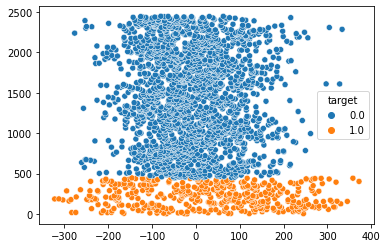

In [38]:
#Scatterplot
l=[]
for i in range(2447):
  l.append(i)
import seaborn as sns
sns.scatterplot(x=x_pca[:,0],y=l,hue=df['target'])

**LDA**


In [39]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x_lda = st.fit_transform(x)
#Choosing the number of Linear Discriminants to be Two
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(x_lda,y)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(49152, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [40]:
#Number of Components
lda.n_components

2

In [41]:
#Transformation
x_lda = lda.transform(x_lda)

In [42]:
#Train-Test Split for LDA Tranformed Features
x_train_lda, x_test_lda, y_train_lda, y_test_lda = train_test_split(x_lda, y, test_size=0.2, random_state=42)

In [43]:
x_lda.shape

(2447, 1)

In [44]:
np.unique(x_lda)

array([-6.43471899, -6.19139723, -6.03962722, ..., 11.36799353,
       12.2627001 , 13.64254069])

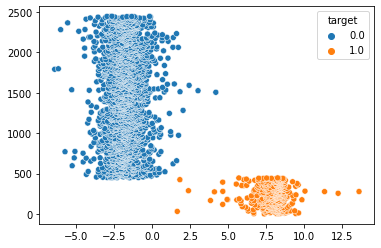

In [45]:
#Scatterplot
sns.scatterplot(x=x_lda[:,0],y=l,hue=df['target'])

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def make_score(y_test,y_pred):
  acc = round(accuracy_score(y_test,y_pred),3)
  f1 = round(f1_score(y_test,y_pred),3)
  auc = round(roc_auc_score(y_test,y_pred),3)
  print(f"Accuracy - {acc}\n F1 score - {f1}\n AUC - {auc}")

**SELECTING THE DESIRED MODELS**


**Multi Layer Perceptron Classifier**


In [47]:
#Multi Layer Perceptron
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(activation='relu',solver='adam',hidden_layer_sizes=(100,),alpha=0.0001,batch_size=250,learning_rate_init=0.001,random_state=42,warm_start=False)

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
#For data without Dimensionality Reduction
mlp.fit(x_train,y_train)
cross_val_score(mlp,x,y,cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by 

array([0.88163265, 0.91020408, 0.95705521, 0.90797546, 0.81799591])

In [50]:
y_pred_dtc = mlp.predict(x_test)
make_score(y_test,y_pred_dtc)

Accuracy - 0.954
 F1 score - 0.872
 AUC - 0.901


In [51]:
#Using Features obtained from PCA
mlp.fit(x_train_pca,y_train_pca)
cross_val_score(mlp,x_pca,y,cv=5)

array([0.93877551, 0.91020408, 0.90797546, 0.93865031, 0.95092025])

In [52]:
y_pred_dtc = mlp.predict(x_test_pca)
make_score(y_test_pca,y_pred_dtc)

Accuracy - 0.951
 F1 score - 0.865
 AUC - 0.918


In [53]:
#Using Features obtained from LDA
mlp.fit(x_train_lda,y_train_lda)
cross_val_score(mlp,x_lda,y,cv=5)

array([0.99795918, 1.        , 0.99386503, 0.99795501, 0.99795501])

In [54]:
y_pred_dtc = mlp.predict(x_test_lda)
make_score(y_test_lda,y_pred_dtc)

Accuracy - 0.996
 F1 score - 0.989
 AUC - 0.998


**Decision Tree Classifier**


In [55]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=7,min_samples_split=0.08,max_leaf_nodes=15)

In [56]:
#For data without Dimensionality Reduction
dtc.fit(x_train,y_train)
cross_val_score(dtc,x,y,cv=5)

array([0.91632653, 0.90204082, 0.8997955 , 0.90593047, 0.94478528])

In [57]:
y_pred_dtc = dtc.predict(x_test)
make_score(y_test,y_pred_dtc)

Accuracy - 0.92
 F1 score - 0.773
 AUC - 0.842


In [58]:
#Using Features obtained from PCA
#PCA should be used mainly for variables which are strongly correlated. If the relationship is weak between variables, PCA does not work well to reduce data.
dtc.fit(x_train_pca,y_train_pca)
cross_val_score(dtc,x_pca,y,cv=5)

array([0.86938776, 0.83469388, 0.83640082, 0.8609407 , 0.85685072])

In [59]:
y_pred_dtc = dtc.predict(x_test_pca)
make_score(y_test_pca,y_pred_dtc)

Accuracy - 0.89
 F1 score - 0.654
 AUC - 0.767


In [60]:
#Using Features obtained from LDA
dtc.fit(x_train_lda,y_train_lda)
cross_val_score(dtc,x_lda,y,cv=5)

array([0.99795918, 0.99795918, 0.98977505, 0.99591002, 0.99795501])

In [61]:
y_pred_dtc = dtc.predict(x_test_lda)
make_score(y_test_lda,y_pred_dtc)

Accuracy - 0.996
 F1 score - 0.989
 AUC - 0.998


**AdaBoost**


In [69]:
#ADABoost
stump = DecisionTreeClassifier(criterion="gini", max_depth=2,max_leaf_nodes=10)
from sklearn.ensemble import AdaBoostClassifier
boost = AdaBoostClassifier(stump ,n_estimators=100)

In [ ]:
y_pred_dtc = boost.predict(x_test)
make_score(y_test,y_pred_dtc)

In [71]:
#Using Features obtained from PCA
boost.fit(x_train_pca,y_train_pca)
cross_val_score(boost,x_pca,y,cv=3)

array([0.92892157, 0.93382353, 0.95705521])

In [72]:
y_pred_dtc = boost.predict(x_test_pca)
make_score(y_test_pca,y_pred_dtc)

Accuracy - 0.969
 F1 score - 0.911
 AUC - 0.929


In [73]:
#Using Features obtained from LDA
boost.fit(x_train_lda,y_train_lda)
cross_val_score(boost,x_lda,y,cv=3)

array([0.99877451, 0.99387255, 0.99877301])

In [74]:
y_pred_dtc = boost.predict(x_test_lda)
make_score(y_test_lda,y_pred_dtc)

Accuracy - 0.996
 F1 score - 0.989
 AUC - 0.998
